In [ ]:
import torch
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
import numpy as np
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
warnings.filterwarnings('ignore')

IMPORTING DATA

In [ ]:
path='/content/drive/MyDrive/dataset_assignment2_ai509'

In [ ]:
data=pd.read_pickle(path, compression='infer')

In [ ]:
data

{'batch_label': 'testing batch 1 of 1',
 'labels': [3,
  8,
  8,
  0,
  6,
  6,
  1,
  6,
  3,
  1,
  0,
  9,
  5,
  7,
  9,
  8,
  5,
  7,
  8,
  6,
  7,
  0,
  4,
  9,
  5,
  2,
  4,
  0,
  9,
  6,
  6,
  5,
  4,
  5,
  9,
  2,
  4,
  1,
  9,
  5,
  4,
  6,
  5,
  6,
  0,
  9,
  3,
  9,
  7,
  6,
  9,
  8,
  0,
  3,
  8,
  8,
  7,
  7,
  4,
  6,
  7,
  3,
  6,
  3,
  6,
  2,
  1,
  2,
  3,
  7,
  2,
  6,
  8,
  8,
  0,
  2,
  9,
  3,
  3,
  8,
  8,
  1,
  1,
  7,
  2,
  5,
  2,
  7,
  8,
  9,
  0,
  3,
  8,
  6,
  4,
  6,
  6,
  0,
  0,
  7,
  4,
  5,
  6,
  3,
  1,
  1,
  3,
  6,
  8,
  7,
  4,
  0,
  6,
  2,
  1,
  3,
  0,
  4,
  2,
  7,
  8,
  3,
  1,
  2,
  8,
  0,
  8,
  3,
  5,
  2,
  4,
  1,
  8,
  9,
  1,
  2,
  9,
  7,
  2,
  9,
  6,
  5,
  6,
  3,
  8,
  7,
  6,
  2,
  5,
  2,
  8,
  9,
  6,
  0,
  0,
  5,
  2,
  9,
  5,
  4,
  2,
  1,
  6,
  6,
  8,
  4,
  8,
  4,
  5,
  0,
  9,
  9,
  9,
  8,
  9,
  9,
  3,
  7,
  5,
  0,
  0,
  5,
  2,
  2,
  3,
  8,
  6,
  3,
  4,
  0,


In [ ]:
len(data['data'])

10000

In [ ]:
len(data['labels'])

10000

In [ ]:
images= data["data"]
classes= data["labels"]

In [ ]:
images

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

In [ ]:
images.shape

(10000, 3072)

In [ ]:
np.unique(classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
type(images)

numpy.ndarray

In [ ]:
type(classes)

list

# 1. VISUALIZING THE IMAGES

In [ ]:
#taking first 10 images
img=images[:10]

In [ ]:
img

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 83,  82,  81, ...,  22,  24,  22],
       [ 23,  19,  21, ..., 118, 123, 118],
       [217, 210, 205, ..., 204, 225, 223]], dtype=uint8)

In [ ]:
len(img)

10

In [ ]:
len(img[0])

3072

In [ ]:
def plot_images(images, classes, rows=10, cols=1):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 30))

    #looping over the subplots
    for index, ax in enumerate(axes):
        if index < len(images):
          #reshaping the images as they are in (3072,) format, so we convert them to rgb I.E (32,32,3) with three channels
            img = images[index].reshape(32, 32, 3)
            #to stop from overlapping
            ax.axis('off')
            ax.set_title(f"Label: {classes[index]}")
            ax.imshow(img)
    plt.show()



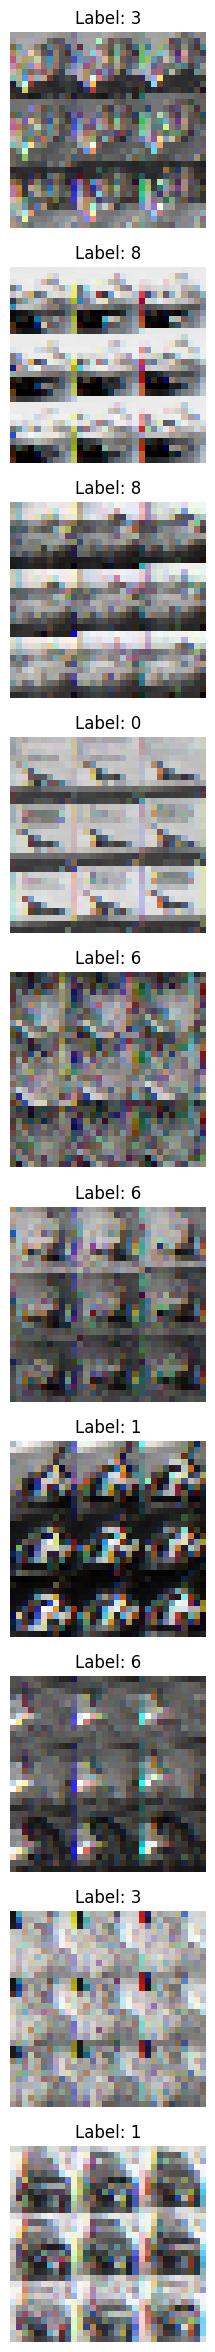

In [ ]:
# Call the function with your images
plot_images(img, classes[:10], 10, 1)

# QUESTION 2

PREPROCESSING THE DATASET

In [ ]:

# NORMALIZING THE DATA
transform = transforms.ToTensor()

#RESHAPING THE IMAGE ARRAY AND NORMAIZING
images = torch.stack([transform(img.reshape(32, 32, 3)) for img in images])


In [ ]:
images.shape

torch.Size([10000, 3, 32, 32])

In [ ]:
images[0]

tensor([[[0.6196, 0.6510, 0.6353,  ..., 0.4471, 0.5608, 0.5451],
         [0.6078, 0.6824, 0.6627,  ..., 0.3686, 0.2275, 0.5490],
         [0.4980, 0.3451, 0.6588,  ..., 0.3412, 0.2784, 0.2902],
         ...,
         [0.5294, 0.7373, 0.6431,  ..., 0.5412, 0.5765, 0.5961],
         [0.6471, 0.4784, 0.9176,  ..., 0.5333, 0.5922, 0.5490],
         [0.6941, 0.5725, 0.4431,  ..., 0.4824, 0.7137, 0.4863]],

        [[0.6235, 0.6275, 0.6235,  ..., 0.4706, 0.5490, 0.5098],
         [0.6078, 0.6549, 0.6627,  ..., 0.3882, 0.2627, 0.5412],
         [0.4275, 0.6000, 0.6667,  ..., 0.3255, 0.2196, 0.5216],
         ...,
         [0.6588, 0.7529, 0.9294,  ..., 0.5882, 0.5843, 0.6549],
         [0.5765, 0.4941, 0.9686,  ..., 0.5294, 0.6980, 0.4039],
         [0.5804, 0.5451, 0.5216,  ..., 0.5686, 0.6863, 0.5059]],

        [[0.6471, 0.6118, 0.6196,  ..., 0.5255, 0.5569, 0.4706],
         [0.6275, 0.6549, 0.6471,  ..., 0.3569, 0.4235, 0.5255],
         [0.1843, 0.6667, 0.6627,  ..., 0.3373, 0.1569, 0.

SPLITTING THE DATASET

In [ ]:
split_index=int(0.8*len(images))
train_images=images[:split_index]
train_classes=classes[:split_index]
test_images=images[split_index:]
test_classes=classes[split_index:]

In [ ]:
train_images.shape

torch.Size([8000, 3, 32, 32])

In [ ]:
test_images.shape

torch.Size([2000, 3, 32, 32])

In [ ]:
print(type(train_images))
print(type(train_classes))
print(type(test_images))
print(type(test_classes))

<class 'torch.Tensor'>
<class 'list'>
<class 'torch.Tensor'>
<class 'list'>


In [ ]:
train_classes=torch.tensor(train_classes)
test_classes=torch.tensor(test_classes)

In [ ]:
print("Number of training images:", len(train_images))
print("Number of training labels:", len(train_classes))
print("Number of testing images:", len(test_images))
print("Number of testing labels:", len(test_classes))


Number of training images: 8000
Number of training labels: 8000
Number of testing images: 2000
Number of testing labels: 2000


In [ ]:
# Create TensorDatasets
train_dataset = TensorDataset(train_images, train_classes)
test_dataset = TensorDataset(test_images, test_classes)

In [ ]:
#loading the data into batches
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


CNN MODEL

In [ ]:
#architecture 1
class CNNModel1(nn.Module):
    def __init__(self,dropout_prob=0.5, active_fun='RELU'):
        super(CNNModel1, self).__init__()

        # activation function
        if active_fun == 'TANH':
            self.active_fun = nn.Tanh()
        elif active_fun == 'RELU':
            self.active_fun = nn.ReLU()

        self.last_lay_activation = nn.Softmax(dim=1)

        #block 1 [block1: [3*3*16]*2],
        self.block_1 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            self.active_fun,
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.dropout_conv = nn.Dropout(dropout_prob)
        self.dropout_fc = nn.Dropout(dropout_prob)
        # Fully Connected layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            self.dropout_fc,
            nn.Linear(16*16*16, 128),
            self.active_fun,
            self.dropout_fc,
            nn.Linear(128, 10),
            self.last_lay_activation
        )


    def forward(self, x):
        x = self.block_1(x)
        x = self.fc(x)
        return x

In [ ]:
#architecture 2
class CNNModel2(nn.Module):
    def __init__(self, dropout_prob=0.5, active_fun='RELU'):
        super(CNNModel2, self).__init__()

        # activation function
        if active_fun == 'TANH':
            self.active_fun = nn.Tanh()
        elif active_fun == 'RELU':
            self.active_fun = nn.ReLU()

        self.last_lay_activation = nn.Softmax(dim=1)

        #block 1 [block1: [3*3*16]*2],
        self.block_1 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            self.active_fun,
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # block 2 [block2: [3*3*32]*2]
        self.block_2 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            self.active_fun,
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.dropout_conv = nn.Dropout(dropout_prob)
        self.dropout_fc = nn.Dropout(dropout_prob)
        # Fully Connected layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            self.dropout_fc,
            nn.Linear(32*8*8, 128),
            self.active_fun,
            self.dropout_fc,
            nn.Linear(128, 10),
            self.last_lay_activation
        )


    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.fc(x)
        return x

In [ ]:
#architecture 3
class CNNModel3(nn.Module):
    def __init__(self, dropout_prob=0.5, active_fun='RELU'):
        super(CNNModel3, self).__init__()

        # activation function
        if active_fun == 'TANH':
            self.active_fun = nn.Tanh()
        elif active_fun == 'RELU':
            self.active_fun = nn.ReLU()

        self.last_lay_activation = nn.Softmax(dim=1)

        #block 1 [block1: [3*3*16]*2],
        self.block_1 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            self.active_fun,
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # block 2 [block2: [3*3*32]*2]
        self.block_2 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            self.active_fun,
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        #block 3 [block3: [3*3*64]*2]
        self.block_3 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            self.active_fun,
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.dropout_conv = nn.Dropout(dropout_prob)
        self.dropout_fc = nn.Dropout(dropout_prob)
        # Fully Connected layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            self.dropout_fc,
            nn.Linear(64*4*4, 128),
            self.active_fun,
            self.dropout_fc,
            nn.Linear(128, 10),
            self.last_lay_activation
        )


    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x= self.block_3(x)
        x = self.fc(x)
        return x

In [ ]:
def weights_init(model, type_of_init='zero'):
    for layer in model.modules():
        if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
            if type_of_init == 'zero':
                nn.init.constant_(layer.weight, 0)
            elif type_of_init == 'random':
                nn.init.normal_(layer.weight, mean=0, std=0.01)
            elif type_of_init == 'he':
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')

In [ ]:
def train_model(model, train_loader, test_loader, epochs=5, learning_rate=0.001):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        #setting the model to training mode
        model.train()
        #loss of current epoch
        curr_loss = 0
        correct_pred=0
        total_pred=0

        for images, classes in train_loader:
            #clearing the gradients
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, classes )
            loss.backward()
            optimizer.step()

            curr_loss += loss.item()

            #the maximum value along the label dimension
            value, predicted = torch.max(outputs, 1)
            total_pred += classes .size(0)
            correct_pred += (predicted == classes).sum().item()

        train_accuracy = 100 * correct_pred / total_pred
        avg_loss=curr_loss/len(train_loader)

        print(f'Epoch {epoch+1}, Average Loss: {avg_loss}, Accuracy: {train_accuracy}')

        # evaluation mode
        model.eval()
        #disable grad computation
        with torch.no_grad():

            correct_test_pred=0
            total_test_pred=0
            test_loss = 0

            for images, classes in test_loader:
                outputs = model(images)
                test_loss += criterion(outputs, classes).item()
                value, predicted = torch.max(outputs, 1)
                total_test_pred += classes.size(0)
                correct_test_pred += (predicted == classes).sum().item()

            test_accuracy = 100 * correct_test_pred / total_test_pred

            print(f'Validation Accuracy: {test_accuracy}')

In [ ]:
model=CNNModel1()
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.253600025177002, Accuracy: 18.8125
Validation Accuracy: 30.0
Epoch 2, Average Loss: 2.171560260772705, Accuracy: 28.8625
Validation Accuracy: 34.45
Epoch 3, Average Loss: 2.1354914655685424, Accuracy: 32.675
Validation Accuracy: 38.5
Epoch 4, Average Loss: 2.108562250137329, Accuracy: 35.6375
Validation Accuracy: 38.8
Epoch 5, Average Loss: 2.091928698539734, Accuracy: 37.0625
Validation Accuracy: 40.4
Epoch 6, Average Loss: 2.0774871587753294, Accuracy: 38.425
Validation Accuracy: 38.75
Epoch 7, Average Loss: 2.070849406242371, Accuracy: 39.2125
Validation Accuracy: 42.4
Epoch 8, Average Loss: 2.0586092128753664, Accuracy: 40.4125
Validation Accuracy: 41.45
Epoch 9, Average Loss: 2.049413600921631, Accuracy: 41.0875
Validation Accuracy: 42.45
Epoch 10, Average Loss: 2.041646743774414, Accuracy: 42.35
Validation Accuracy: 43.1


In [ ]:
model=CNNModel2()
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.249290229797363, Accuracy: 19.0625
Validation Accuracy: 27.6
Epoch 2, Average Loss: 2.174595525741577, Accuracy: 28.0125
Validation Accuracy: 32.9
Epoch 3, Average Loss: 2.140109327316284, Accuracy: 31.8125
Validation Accuracy: 33.95
Epoch 4, Average Loss: 2.123619920730591, Accuracy: 33.25
Validation Accuracy: 35.2
Epoch 5, Average Loss: 2.1113108816146853, Accuracy: 34.375
Validation Accuracy: 37.2
Epoch 6, Average Loss: 2.095682138442993, Accuracy: 35.675
Validation Accuracy: 38.5
Epoch 7, Average Loss: 2.0834576253890993, Accuracy: 37.3375
Validation Accuracy: 38.3
Epoch 8, Average Loss: 2.0780535135269167, Accuracy: 37.8375
Validation Accuracy: 39.15
Epoch 9, Average Loss: 2.063194820404053, Accuracy: 39.4875
Validation Accuracy: 41.0
Epoch 10, Average Loss: 2.059894401550293, Accuracy: 39.775
Validation Accuracy: 40.2


In [ ]:
model=CNNModel3()
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.279155029296875, Accuracy: 14.4125
Validation Accuracy: 23.15
Epoch 2, Average Loss: 2.2154615287780763, Accuracy: 23.125
Validation Accuracy: 25.55
Epoch 3, Average Loss: 2.1789389209747316, Accuracy: 27.5875
Validation Accuracy: 30.7
Epoch 4, Average Loss: 2.1566225337982177, Accuracy: 29.6875
Validation Accuracy: 28.4
Epoch 5, Average Loss: 2.1502017154693602, Accuracy: 30.1
Validation Accuracy: 32.0
Epoch 6, Average Loss: 2.134033145904541, Accuracy: 31.875
Validation Accuracy: 34.2
Epoch 7, Average Loss: 2.126419906616211, Accuracy: 33.175
Validation Accuracy: 28.3
Epoch 8, Average Loss: 2.123319007873535, Accuracy: 33.1875
Validation Accuracy: 32.75
Epoch 9, Average Loss: 2.1091850748062133, Accuracy: 34.1875
Validation Accuracy: 35.55
Epoch 10, Average Loss: 2.101560276031494, Accuracy: 35.4125
Validation Accuracy: 35.7


In [ ]:
model=CNNModel1(active_fun='TANH')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.1972873611450194, Accuracy: 27.625
Validation Accuracy: 37.5
Epoch 2, Average Loss: 2.081741976737976, Accuracy: 39.375
Validation Accuracy: 40.75
Epoch 3, Average Loss: 2.042641350746155, Accuracy: 42.9875
Validation Accuracy: 42.2
Epoch 4, Average Loss: 2.0199743995666504, Accuracy: 45.325
Validation Accuracy: 43.9
Epoch 5, Average Loss: 1.9947503509521485, Accuracy: 48.15
Validation Accuracy: 45.15
Epoch 6, Average Loss: 1.9830284938812255, Accuracy: 49.2125
Validation Accuracy: 45.55
Epoch 7, Average Loss: 1.9682247257232666, Accuracy: 50.8625
Validation Accuracy: 46.15
Epoch 8, Average Loss: 1.9564270906448364, Accuracy: 51.725
Validation Accuracy: 47.0
Epoch 9, Average Loss: 1.9440748109817505, Accuracy: 52.85
Validation Accuracy: 48.2
Epoch 10, Average Loss: 1.9367102518081665, Accuracy: 53.7875
Validation Accuracy: 47.95


In [ ]:
model=CNNModel2(active_fun='TANH')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.1967795543670654, Accuracy: 26.725
Validation Accuracy: 33.9
Epoch 2, Average Loss: 2.10187024974823, Accuracy: 36.5875
Validation Accuracy: 33.9
Epoch 3, Average Loss: 2.0706805057525637, Accuracy: 39.725
Validation Accuracy: 40.15
Epoch 4, Average Loss: 2.043468227386475, Accuracy: 42.3625
Validation Accuracy: 41.65
Epoch 5, Average Loss: 2.0281082725524904, Accuracy: 43.5
Validation Accuracy: 43.35
Epoch 6, Average Loss: 2.0087069034576417, Accuracy: 45.925
Validation Accuracy: 43.55
Epoch 7, Average Loss: 1.9981933965682983, Accuracy: 47.2
Validation Accuracy: 44.75
Epoch 8, Average Loss: 1.9889699831008911, Accuracy: 47.6125
Validation Accuracy: 45.75
Epoch 9, Average Loss: 1.9819828300476074, Accuracy: 48.3625
Validation Accuracy: 46.45
Epoch 10, Average Loss: 1.9718251152038575, Accuracy: 49.6875
Validation Accuracy: 45.15


In [ ]:
model=CNNModel3(active_fun='TANH')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2298731880187987, Accuracy: 21.225
Validation Accuracy: 30.4
Epoch 2, Average Loss: 2.1402625751495363, Accuracy: 31.65
Validation Accuracy: 34.0
Epoch 3, Average Loss: 2.1042757205963136, Accuracy: 35.7625
Validation Accuracy: 36.95
Epoch 4, Average Loss: 2.0745974988937377, Accuracy: 38.8625
Validation Accuracy: 38.2
Epoch 5, Average Loss: 2.0564597578048707, Accuracy: 40.725
Validation Accuracy: 41.0
Epoch 6, Average Loss: 2.0427141103744506, Accuracy: 41.8
Validation Accuracy: 40.7
Epoch 7, Average Loss: 2.025346707344055, Accuracy: 43.825
Validation Accuracy: 41.2
Epoch 8, Average Loss: 2.0187697019577024, Accuracy: 44.475
Validation Accuracy: 41.95
Epoch 9, Average Loss: 2.0072377786636353, Accuracy: 45.4625
Validation Accuracy: 43.25
Epoch 10, Average Loss: 1.9968778896331787, Accuracy: 46.5875
Validation Accuracy: 40.4


# QUESTION 3

## DROPOUT PROBABILITY 0.2

In [ ]:
model=CNNModel1(dropout_prob=0.2)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2252859573364256, Accuracy: 22.875
Validation Accuracy: 31.1
Epoch 2, Average Loss: 2.132857332229614, Accuracy: 33.2125
Validation Accuracy: 35.7
Epoch 3, Average Loss: 2.097865467071533, Accuracy: 36.475
Validation Accuracy: 37.55
Epoch 4, Average Loss: 2.0740337257385253, Accuracy: 39.0375
Validation Accuracy: 38.45
Epoch 5, Average Loss: 2.053233953475952, Accuracy: 41.45
Validation Accuracy: 38.5
Epoch 6, Average Loss: 2.040420253753662, Accuracy: 42.4
Validation Accuracy: 40.1
Epoch 7, Average Loss: 2.007313810348511, Accuracy: 45.75
Validation Accuracy: 44.8
Epoch 8, Average Loss: 1.993574462890625, Accuracy: 47.2125
Validation Accuracy: 44.85
Epoch 9, Average Loss: 1.979485397338867, Accuracy: 49.0125
Validation Accuracy: 44.9
Epoch 10, Average Loss: 1.9626757907867431, Accuracy: 50.8375
Validation Accuracy: 45.75


In [ ]:
model=CNNModel2(dropout_prob=0.2)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.223645122528076, Accuracy: 22.5625
Validation Accuracy: 31.45
Epoch 2, Average Loss: 2.1258187007904055, Accuracy: 33.3875
Validation Accuracy: 34.95
Epoch 3, Average Loss: 2.089379702568054, Accuracy: 36.6875
Validation Accuracy: 37.55
Epoch 4, Average Loss: 2.0755879383087157, Accuracy: 38.425
Validation Accuracy: 38.5
Epoch 5, Average Loss: 2.0546011199951173, Accuracy: 40.7
Validation Accuracy: 35.7
Epoch 6, Average Loss: 2.034487813949585, Accuracy: 42.6
Validation Accuracy: 40.65
Epoch 7, Average Loss: 2.0265743007659913, Accuracy: 43.1625
Validation Accuracy: 40.9
Epoch 8, Average Loss: 2.015557445526123, Accuracy: 44.6875
Validation Accuracy: 42.05
Epoch 9, Average Loss: 2.0012631578445434, Accuracy: 45.825
Validation Accuracy: 42.9
Epoch 10, Average Loss: 1.9906814451217651, Accuracy: 47.0875
Validation Accuracy: 43.15


In [ ]:
model=CNNModel3(dropout_prob=0.2)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2585956535339355, Accuracy: 17.4625
Validation Accuracy: 25.95
Epoch 2, Average Loss: 2.178038688659668, Accuracy: 27.0625
Validation Accuracy: 30.6
Epoch 3, Average Loss: 2.1373247623443605, Accuracy: 31.45
Validation Accuracy: 32.95
Epoch 4, Average Loss: 2.1192479581832884, Accuracy: 33.4875
Validation Accuracy: 35.05
Epoch 5, Average Loss: 2.094339425086975, Accuracy: 36.3375
Validation Accuracy: 35.0
Epoch 6, Average Loss: 2.0852577838897703, Accuracy: 36.875
Validation Accuracy: 37.65
Epoch 7, Average Loss: 2.0701628303527833, Accuracy: 38.8
Validation Accuracy: 37.6
Epoch 8, Average Loss: 2.057310706138611, Accuracy: 39.925
Validation Accuracy: 39.5
Epoch 9, Average Loss: 2.0491146421432496, Accuracy: 41.0125
Validation Accuracy: 40.25
Epoch 10, Average Loss: 2.036034955024719, Accuracy: 42.5
Validation Accuracy: 40.9


## DROPOUT PROBABILITY 0.5

In [ ]:
model=CNNModel1(dropout_prob=0.5)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2300471477508546, Accuracy: 21.675
Validation Accuracy: 30.75
Epoch 2, Average Loss: 2.1447590045928955, Accuracy: 31.6375
Validation Accuracy: 36.3
Epoch 3, Average Loss: 2.1072497663497924, Accuracy: 35.75
Validation Accuracy: 36.9
Epoch 4, Average Loss: 2.0891640005111696, Accuracy: 37.1875
Validation Accuracy: 40.2
Epoch 5, Average Loss: 2.0626114711761474, Accuracy: 40.0125
Validation Accuracy: 40.85
Epoch 6, Average Loss: 2.043307716369629, Accuracy: 42.2375
Validation Accuracy: 42.85
Epoch 7, Average Loss: 2.0273514528274537, Accuracy: 43.7
Validation Accuracy: 42.55
Epoch 8, Average Loss: 2.019626753807068, Accuracy: 44.3625
Validation Accuracy: 43.65
Epoch 9, Average Loss: 2.002881266593933, Accuracy: 46.3
Validation Accuracy: 42.85
Epoch 10, Average Loss: 1.9891141767501832, Accuracy: 47.4625
Validation Accuracy: 44.75


In [ ]:
model=CNNModel2(dropout_prob=0.5)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2598224449157716, Accuracy: 17.9875
Validation Accuracy: 27.4
Epoch 2, Average Loss: 2.1709468173980713, Accuracy: 28.4375
Validation Accuracy: 30.4
Epoch 3, Average Loss: 2.138229372024536, Accuracy: 32.0375
Validation Accuracy: 35.65
Epoch 4, Average Loss: 2.1101651334762574, Accuracy: 34.675
Validation Accuracy: 36.75
Epoch 5, Average Loss: 2.097659592628479, Accuracy: 35.5875
Validation Accuracy: 39.7
Epoch 6, Average Loss: 2.0805855770111084, Accuracy: 37.6375
Validation Accuracy: 39.75
Epoch 7, Average Loss: 2.066215802192688, Accuracy: 39.1625
Validation Accuracy: 40.45
Epoch 8, Average Loss: 2.056196666717529, Accuracy: 40.425
Validation Accuracy: 41.45
Epoch 9, Average Loss: 2.0441263427734375, Accuracy: 41.6875
Validation Accuracy: 40.8
Epoch 10, Average Loss: 2.04175452041626, Accuracy: 41.6375
Validation Accuracy: 41.1


In [ ]:
model=CNNModel3(dropout_prob=0.5)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.289231420516968, Accuracy: 13.45
Validation Accuracy: 19.45
Epoch 2, Average Loss: 2.219949691772461, Accuracy: 22.5625
Validation Accuracy: 27.05
Epoch 3, Average Loss: 2.171369327545166, Accuracy: 28.2625
Validation Accuracy: 30.05
Epoch 4, Average Loss: 2.1560230083465575, Accuracy: 29.6375
Validation Accuracy: 32.15
Epoch 5, Average Loss: 2.1364053478240965, Accuracy: 31.65
Validation Accuracy: 34.25
Epoch 6, Average Loss: 2.119577157974243, Accuracy: 32.875
Validation Accuracy: 34.05
Epoch 7, Average Loss: 2.1119480447769163, Accuracy: 34.3625
Validation Accuracy: 35.7
Epoch 8, Average Loss: 2.0944370164871216, Accuracy: 36.3625
Validation Accuracy: 37.35
Epoch 9, Average Loss: 2.0841638669967653, Accuracy: 37.4125
Validation Accuracy: 36.85
Epoch 10, Average Loss: 2.0814868335723875, Accuracy: 37.425
Validation Accuracy: 38.65


## DROPOUT PROBABILITY 0.8

In [ ]:
model=CNNModel1(dropout_prob=0.8)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2935716400146484, Accuracy: 12.5
Validation Accuracy: 23.3
Epoch 2, Average Loss: 2.2492586975097657, Accuracy: 18.8875
Validation Accuracy: 25.3
Epoch 3, Average Loss: 2.2206149559020996, Accuracy: 22.1
Validation Accuracy: 31.8
Epoch 4, Average Loss: 2.2029385623931885, Accuracy: 24.3625
Validation Accuracy: 32.9
Epoch 5, Average Loss: 2.1940707302093507, Accuracy: 25.375
Validation Accuracy: 33.05
Epoch 6, Average Loss: 2.1814993686676027, Accuracy: 26.55
Validation Accuracy: 35.45
Epoch 7, Average Loss: 2.175547035217285, Accuracy: 27.5375
Validation Accuracy: 33.8
Epoch 8, Average Loss: 2.167952854156494, Accuracy: 28.4125
Validation Accuracy: 38.0
Epoch 9, Average Loss: 2.1661131381988525, Accuracy: 28.55
Validation Accuracy: 37.75
Epoch 10, Average Loss: 2.157337657928467, Accuracy: 29.75
Validation Accuracy: 39.05


In [ ]:
model=CNNModel2(dropout_prob=0.8)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.289988229751587, Accuracy: 12.9875
Validation Accuracy: 20.15
Epoch 2, Average Loss: 2.2385571155548094, Accuracy: 20.125
Validation Accuracy: 26.1
Epoch 3, Average Loss: 2.2054309520721436, Accuracy: 24.225
Validation Accuracy: 30.55
Epoch 4, Average Loss: 2.1900182342529297, Accuracy: 25.9875
Validation Accuracy: 30.4
Epoch 5, Average Loss: 2.176062698364258, Accuracy: 27.4125
Validation Accuracy: 32.45
Epoch 6, Average Loss: 2.1666837768554688, Accuracy: 28.625
Validation Accuracy: 34.15
Epoch 7, Average Loss: 2.162039619445801, Accuracy: 29.1375
Validation Accuracy: 35.15
Epoch 8, Average Loss: 2.1491924304962158, Accuracy: 30.625
Validation Accuracy: 34.4
Epoch 9, Average Loss: 2.144926856994629, Accuracy: 30.8125
Validation Accuracy: 34.95
Epoch 10, Average Loss: 2.141503818511963, Accuracy: 31.325
Validation Accuracy: 36.15


In [ ]:
model=CNNModel3(dropout_prob=0.8)
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.300116897583008, Accuracy: 10.15
Validation Accuracy: 13.5
Epoch 2, Average Loss: 2.2654078731536864, Accuracy: 16.7125
Validation Accuracy: 26.65
Epoch 3, Average Loss: 2.22844167137146, Accuracy: 21.4875
Validation Accuracy: 28.4
Epoch 4, Average Loss: 2.199394697189331, Accuracy: 25.0125
Validation Accuracy: 27.25
Epoch 5, Average Loss: 2.1894987602233886, Accuracy: 25.7375
Validation Accuracy: 30.05
Epoch 6, Average Loss: 2.1763282356262206, Accuracy: 27.1125
Validation Accuracy: 31.85
Epoch 7, Average Loss: 2.1680867958068846, Accuracy: 28.2375
Validation Accuracy: 31.55
Epoch 8, Average Loss: 2.160950050354004, Accuracy: 28.925
Validation Accuracy: 30.75
Epoch 9, Average Loss: 2.1700700206756594, Accuracy: 28.0
Validation Accuracy: 31.1
Epoch 10, Average Loss: 2.1566964950561522, Accuracy: 29.3625
Validation Accuracy: 32.55


# QUESTION 4

In [ ]:
model=CNNModel1(dropout_prob=0.5)
weights_init(model, type_of_init='zero')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)


Epoch 1, Average Loss: 2.302667392730713, Accuracy: 9.9125
Validation Accuracy: 9.7
Epoch 2, Average Loss: 2.285813823699951, Accuracy: 12.05
Validation Accuracy: 19.3
Epoch 3, Average Loss: 2.2604078330993653, Accuracy: 16.55
Validation Accuracy: 22.9
Epoch 4, Average Loss: 2.244663423538208, Accuracy: 19.9625
Validation Accuracy: 25.6
Epoch 5, Average Loss: 2.239336944580078, Accuracy: 20.8625
Validation Accuracy: 26.05
Epoch 6, Average Loss: 2.235344476699829, Accuracy: 20.35
Validation Accuracy: 24.75
Epoch 7, Average Loss: 2.231446376800537, Accuracy: 21.25
Validation Accuracy: 27.1
Epoch 8, Average Loss: 2.2279492015838622, Accuracy: 21.3375
Validation Accuracy: 27.2
Epoch 9, Average Loss: 2.225026247024536, Accuracy: 21.775
Validation Accuracy: 28.45
Epoch 10, Average Loss: 2.226307260513306, Accuracy: 21.225
Validation Accuracy: 28.25


In [ ]:
model=CNNModel2(dropout_prob=0.5)
weights_init(model, type_of_init='zero')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.3026180419921873, Accuracy: 10.0125
Validation Accuracy: 9.95
Epoch 2, Average Loss: 2.2768981990814208, Accuracy: 15.125
Validation Accuracy: 22.25
Epoch 3, Average Loss: 2.2264985427856447, Accuracy: 21.8
Validation Accuracy: 25.95
Epoch 4, Average Loss: 2.209467197418213, Accuracy: 23.5375
Validation Accuracy: 26.15
Epoch 5, Average Loss: 2.1974186820983888, Accuracy: 25.3
Validation Accuracy: 27.1
Epoch 6, Average Loss: 2.1931885261535644, Accuracy: 25.8625
Validation Accuracy: 27.45
Epoch 7, Average Loss: 2.18800640296936, Accuracy: 26.3375
Validation Accuracy: 27.9
Epoch 8, Average Loss: 2.1798774223327637, Accuracy: 27.2625
Validation Accuracy: 28.9
Epoch 9, Average Loss: 2.1756364154815673, Accuracy: 27.5125
Validation Accuracy: 29.75
Epoch 10, Average Loss: 2.174652576446533, Accuracy: 27.8625
Validation Accuracy: 30.0


In [ ]:
model=CNNModel3(dropout_prob=0.5)
weights_init(model, type_of_init='zero')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.3026654872894285, Accuracy: 9.3625
Validation Accuracy: 10.55
Epoch 2, Average Loss: 2.302642992019653, Accuracy: 9.8625
Validation Accuracy: 10.55
Epoch 3, Average Loss: 2.3026195850372315, Accuracy: 9.9625
Validation Accuracy: 9.45
Epoch 4, Average Loss: 2.3026138458251952, Accuracy: 10.1125
Validation Accuracy: 9.45
Epoch 5, Average Loss: 2.3025991077423096, Accuracy: 10.1375
Validation Accuracy: 9.45
Epoch 6, Average Loss: 2.302593063354492, Accuracy: 10.1375
Validation Accuracy: 9.45
Epoch 7, Average Loss: 2.3025787887573244, Accuracy: 9.95
Validation Accuracy: 9.45
Epoch 8, Average Loss: 2.3025787887573244, Accuracy: 10.1875
Validation Accuracy: 9.45
Epoch 9, Average Loss: 2.3025555744171142, Accuracy: 10.3
Validation Accuracy: 9.2
Epoch 10, Average Loss: 2.3025471382141114, Accuracy: 10.0625
Validation Accuracy: 9.2


In [ ]:
model=CNNModel1(dropout_prob=0.5)
weights_init(model, type_of_init='he')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2939307746887208, Accuracy: 15.125
Validation Accuracy: 27.0
Epoch 2, Average Loss: 2.1871486682891845, Accuracy: 26.8875
Validation Accuracy: 31.85
Epoch 3, Average Loss: 2.1468524379730223, Accuracy: 31.175
Validation Accuracy: 36.5
Epoch 4, Average Loss: 2.115038438796997, Accuracy: 34.6
Validation Accuracy: 38.35
Epoch 5, Average Loss: 2.084881057739258, Accuracy: 37.625
Validation Accuracy: 39.75
Epoch 6, Average Loss: 2.0708050050735474, Accuracy: 39.2875
Validation Accuracy: 41.4
Epoch 7, Average Loss: 2.054701174736023, Accuracy: 41.05
Validation Accuracy: 42.15
Epoch 8, Average Loss: 2.0449198637008665, Accuracy: 41.775
Validation Accuracy: 43.95
Epoch 9, Average Loss: 2.033041435241699, Accuracy: 43.0625
Validation Accuracy: 42.75
Epoch 10, Average Loss: 2.022426510810852, Accuracy: 44.0625
Validation Accuracy: 44.45


In [ ]:
model=CNNModel2(dropout_prob=0.5)
weights_init(model, type_of_init='he')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.267912748336792, Accuracy: 16.9875
Validation Accuracy: 23.45
Epoch 2, Average Loss: 2.175848424911499, Accuracy: 27.3875
Validation Accuracy: 33.75
Epoch 3, Average Loss: 2.1278537311553953, Accuracy: 33.325
Validation Accuracy: 36.05
Epoch 4, Average Loss: 2.0981371383666994, Accuracy: 36.125
Validation Accuracy: 39.7
Epoch 5, Average Loss: 2.075813395500183, Accuracy: 38.9625
Validation Accuracy: 39.55
Epoch 6, Average Loss: 2.0624378185272216, Accuracy: 39.825
Validation Accuracy: 42.65
Epoch 7, Average Loss: 2.0442991886138917, Accuracy: 41.7125
Validation Accuracy: 42.5
Epoch 8, Average Loss: 2.038199704170227, Accuracy: 42.1625
Validation Accuracy: 43.35
Epoch 9, Average Loss: 2.025927698135376, Accuracy: 43.8125
Validation Accuracy: 43.45
Epoch 10, Average Loss: 2.0172180786132814, Accuracy: 44.3375
Validation Accuracy: 42.7


In [ ]:
model=CNNModel3(dropout_prob=0.5)
weights_init(model, type_of_init='he')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.2830637626647947, Accuracy: 14.7625
Validation Accuracy: 21.45
Epoch 2, Average Loss: 2.206618999481201, Accuracy: 24.1
Validation Accuracy: 29.15
Epoch 3, Average Loss: 2.158181577682495, Accuracy: 29.4
Validation Accuracy: 34.4
Epoch 4, Average Loss: 2.1262686567306517, Accuracy: 33.125
Validation Accuracy: 35.15
Epoch 5, Average Loss: 2.0997034034729003, Accuracy: 35.575
Validation Accuracy: 36.15
Epoch 6, Average Loss: 2.093912840843201, Accuracy: 36.05
Validation Accuracy: 38.4
Epoch 7, Average Loss: 2.076918028831482, Accuracy: 38.0125
Validation Accuracy: 39.9
Epoch 8, Average Loss: 2.0593467721939085, Accuracy: 39.675
Validation Accuracy: 39.0
Epoch 9, Average Loss: 2.0487956790924073, Accuracy: 40.8
Validation Accuracy: 41.45
Epoch 10, Average Loss: 2.0416839389801025, Accuracy: 41.6625
Validation Accuracy: 39.5


In [ ]:
model=CNNModel1(dropout_prob=0.5)
weights_init(model, type_of_init='random')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.28249499130249, Accuracy: 13.975
Validation Accuracy: 19.55
Epoch 2, Average Loss: 2.211802988052368, Accuracy: 23.825
Validation Accuracy: 29.4
Epoch 3, Average Loss: 2.176850038528442, Accuracy: 27.8
Validation Accuracy: 31.8
Epoch 4, Average Loss: 2.153818678855896, Accuracy: 30.625
Validation Accuracy: 34.5
Epoch 5, Average Loss: 2.1396469326019285, Accuracy: 31.4375
Validation Accuracy: 34.9
Epoch 6, Average Loss: 2.1226740474700927, Accuracy: 33.6875
Validation Accuracy: 35.9
Epoch 7, Average Loss: 2.1143533964157104, Accuracy: 34.075
Validation Accuracy: 37.0
Epoch 8, Average Loss: 2.1013719987869264, Accuracy: 35.8375
Validation Accuracy: 37.7
Epoch 9, Average Loss: 2.095481563568115, Accuracy: 36.3125
Validation Accuracy: 38.4
Epoch 10, Average Loss: 2.0864809436798097, Accuracy: 37.2125
Validation Accuracy: 38.5


In [ ]:
model=CNNModel2(dropout_prob=0.5)
weights_init(model, type_of_init='random')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.301082368850708, Accuracy: 10.8375
Validation Accuracy: 16.8
Epoch 2, Average Loss: 2.2462663497924806, Accuracy: 19.2375
Validation Accuracy: 23.0
Epoch 3, Average Loss: 2.2037986602783204, Accuracy: 24.5125
Validation Accuracy: 27.8
Epoch 4, Average Loss: 2.1832758712768556, Accuracy: 26.7
Validation Accuracy: 29.65
Epoch 5, Average Loss: 2.1717107372283935, Accuracy: 27.9625
Validation Accuracy: 29.5
Epoch 6, Average Loss: 2.1640639724731447, Accuracy: 29.0375
Validation Accuracy: 30.3
Epoch 7, Average Loss: 2.155389295578003, Accuracy: 29.65
Validation Accuracy: 31.45
Epoch 8, Average Loss: 2.150304630279541, Accuracy: 30.1
Validation Accuracy: 31.3
Epoch 9, Average Loss: 2.1478520069122315, Accuracy: 29.9875
Validation Accuracy: 31.75
Epoch 10, Average Loss: 2.141683374404907, Accuracy: 30.975
Validation Accuracy: 32.6


In [ ]:
model=CNNModel3(dropout_prob=0.5)
weights_init(model, type_of_init='random')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.3025885429382322, Accuracy: 10.3625
Validation Accuracy: 12.3
Epoch 2, Average Loss: 2.2736387252807617, Accuracy: 15.2625
Validation Accuracy: 21.3
Epoch 3, Average Loss: 2.239177824020386, Accuracy: 19.7375
Validation Accuracy: 24.45
Epoch 4, Average Loss: 2.221189437866211, Accuracy: 22.25
Validation Accuracy: 25.95
Epoch 5, Average Loss: 2.2072602443695066, Accuracy: 23.7375
Validation Accuracy: 28.85
Epoch 6, Average Loss: 2.195048439025879, Accuracy: 25.1625
Validation Accuracy: 29.2
Epoch 7, Average Loss: 2.1835959033966064, Accuracy: 26.125
Validation Accuracy: 28.0
Epoch 8, Average Loss: 2.176700242996216, Accuracy: 27.4875
Validation Accuracy: 30.35
Epoch 9, Average Loss: 2.1653416423797607, Accuracy: 28.1375
Validation Accuracy: 30.55
Epoch 10, Average Loss: 2.1689621238708496, Accuracy: 28.1375
Validation Accuracy: 30.85


# QUESTION 5

In [ ]:
model=CNNModel1(dropout_prob=0.2,active_fun='TANH')
weights_init(model, type_of_init='he')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.232803909301758, Accuracy: 21.8625
Validation Accuracy: 32.8
Epoch 2, Average Loss: 2.065810029029846, Accuracy: 39.65
Validation Accuracy: 41.95
Epoch 3, Average Loss: 1.9890179033279418, Accuracy: 48.65
Validation Accuracy: 44.2
Epoch 4, Average Loss: 1.9492272119522094, Accuracy: 52.775
Validation Accuracy: 45.65
Epoch 5, Average Loss: 1.9092688465118408, Accuracy: 57.325
Validation Accuracy: 47.15
Epoch 6, Average Loss: 1.8860837450027466, Accuracy: 59.7375
Validation Accuracy: 47.5
Epoch 7, Average Loss: 1.8618211793899535, Accuracy: 62.075
Validation Accuracy: 48.6
Epoch 8, Average Loss: 1.8400781002044677, Accuracy: 64.6875
Validation Accuracy: 48.85
Epoch 9, Average Loss: 1.818244360923767, Accuracy: 66.525
Validation Accuracy: 49.45
Epoch 10, Average Loss: 1.8014596290588378, Accuracy: 68.1625
Validation Accuracy: 50.2


In [ ]:
model=CNNModel1(dropout_prob=0.2,active_fun='TANH')
weights_init(model, type_of_init='he')
train_model(model, train_loader, test_loader, epochs=20, learning_rate=0.001)

Epoch 1, Average Loss: 2.231658452987671, Accuracy: 22.125
Validation Accuracy: 30.15
Epoch 2, Average Loss: 2.095926784515381, Accuracy: 36.45
Validation Accuracy: 38.2
Epoch 3, Average Loss: 2.0144321584701537, Accuracy: 45.4375
Validation Accuracy: 44.35
Epoch 4, Average Loss: 1.9589538555145263, Accuracy: 51.6625
Validation Accuracy: 45.9
Epoch 5, Average Loss: 1.9203541631698609, Accuracy: 56.2125
Validation Accuracy: 48.1
Epoch 6, Average Loss: 1.8883448266983032, Accuracy: 59.6375
Validation Accuracy: 47.35
Epoch 7, Average Loss: 1.8635428314208984, Accuracy: 61.9125
Validation Accuracy: 48.4
Epoch 8, Average Loss: 1.8370674715042115, Accuracy: 64.3125
Validation Accuracy: 49.45
Epoch 9, Average Loss: 1.8131192502975464, Accuracy: 67.375
Validation Accuracy: 49.95
Epoch 10, Average Loss: 1.7999376487731933, Accuracy: 68.6
Validation Accuracy: 48.95
Epoch 11, Average Loss: 1.7857753782272339, Accuracy: 69.9625
Validation Accuracy: 50.05
Epoch 12, Average Loss: 1.7644434061050416,

#QUESTION 6

In [ ]:
#architecture 1
class CNNModel1(nn.Module):
    def __init__(self,dropout_prob=0.5):
        super(CNNModel1, self).__init__()

        #block 1 [block1: [3*3*16]*2],
        self.block_1 = nn.Sequential(
            #convolutional layer
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            #max ooling layer
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.dropout_conv = nn.Dropout(dropout_prob)
        self.dropout_fc = nn.Dropout(dropout_prob)
        # Fully Connected layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            self.dropout_fc,
            nn.Linear(16*16*16, 128),
            self.dropout_fc,
            nn.Linear(128, 10),
        )


    def forward(self, x):
        x = self.block_1(x)
        x = self.fc(x)
        return x

In [ ]:
model=CNNModel1(dropout_prob=0.2)
weights_init(model, type_of_init='he')
train_model(model, train_loader, test_loader, epochs=10, learning_rate=0.001)

Epoch 1, Average Loss: 2.961315366744995, Accuracy: 29.9125
Validation Accuracy: 35.25
Epoch 2, Average Loss: 1.6245027589797973, Accuracy: 43.375
Validation Accuracy: 43.35
Epoch 3, Average Loss: 1.461688105583191, Accuracy: 48.3375
Validation Accuracy: 46.0
Epoch 4, Average Loss: 1.3738958110809327, Accuracy: 52.0875
Validation Accuracy: 45.4
Epoch 5, Average Loss: 1.311129448890686, Accuracy: 54.075
Validation Accuracy: 45.25
Epoch 6, Average Loss: 1.2426313619613647, Accuracy: 57.125
Validation Accuracy: 47.05
Epoch 7, Average Loss: 1.1962087945938111, Accuracy: 58.7125
Validation Accuracy: 48.3
Epoch 8, Average Loss: 1.1500423684120178, Accuracy: 60.0625
Validation Accuracy: 46.6
Epoch 9, Average Loss: 1.1137212591171264, Accuracy: 60.775
Validation Accuracy: 46.45
Epoch 10, Average Loss: 1.0841602091789246, Accuracy: 62.475
Validation Accuracy: 46.7
